# Unit 5 - Financial Planning

In [253]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [254]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [255]:
# Set current amount of crypto assets
# YOUR CODE HERE!
my_btc = 1.2
my_eth = 5.3

In [256]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [257]:
# Fetch current BTC price
# YOUR CODE HERE!
btc_data = requests.get(btc_url).json()
current_btc = btc_data['data']['1']['quotes']['USD']['price']
# Fetch current ETH price
# YOUR CODE HERE!
eth_data = requests.get(eth_url).json()
current_eth = eth_data['data']['1027']['quotes']['USD']['price']

# Compute current value of my crpto
# YOUR CODE HERE!
my_btc_value = current_btc * my_btc
my_eth_value = current_eth * my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $47811.60
The current value of your 5.3 ETH is $15885.80


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [258]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [259]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")


In [260]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("2020-05-01", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
# YOUR CODE HERE!
df_portfolio_current = alpaca.get_bars(
    tickers,
    timeframe,
    start=today,
    
).df


# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG = df_portfolio_current[df_portfolio_current['symbol']=='AGG'].drop('symbol', axis=1)
SPY = df_portfolio_current[df_portfolio_current['symbol']=='SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_portfolio_current = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
# YOUR CODE HERE!
df_portfolio_current

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2020-05-01 04:00:00+00:00  116.97  117.0998  116.6775  116.87  6099893   
2020-05-04 04:00:00+00:00  116.89  117.0900  116.8700  116.97  3684081   
2020-05-05 04:00:00+00:00  116.96  116.9700  116.8100  116.88  4612127   
2020-05-06 04:00:00+00:00  116.44  116.7100  116.3000  116.41  6394949   
2020-05-07 04:00:00+00:00  116.61  116.7700  116.4200  116.77  3788632   
...                           ...       ...       ...     ...      ...   
2022-04-08 04:00:00+00:00  104.82  105.0100  104.6150  104.73  6501822   
2022-04-11 04:00:00+00:00  104.44  104.5050  104.1700  104.28  8377902   
2022-04-12 04:00:00+00:00  104.83  104.9200  104.5800  104.61  8448652   
2022-04-13 04:00:00+00:00  104.77  105.0900  104.7400  104.82  6868550   
2022-04-14 04:00:00+00:00  104.73  104.7400  103.9300  103.97  8505987   

                                                      SPY                      \
                          trade_count        vwap    open      high       low   
timestamp                                                                       
2020-05-01 04:00:00+00:00       24395  116.846123  285.16  290.6572  281.5200   
2020-05-04 04:00:00+00:00       15545  116.960599  280.46  283.9000  279.1300   
2020-05-05 04:00:00+00:00       15150  116.879635  286.66  289.2500  283.7134   
2020-05-06 04:00:00+00:00       20233  116.426742  288.01  288.4600  283.7800   
2020-05-07 04:00:00+00:00       15964  116.641830  287.79  289.7800  287.1300   
...                               ...         ...     ...       ...       ...   
2022-04-08 04:00:00+00:00       24900  104.804999  448.04  450.6300  445.9400   
2022-04-11 04:00:00+00:00       29767  104.312835  444.11  445.0000  439.3900   
2022-04-12 04:00:00+00:00       29955  104.740856  443.02  445.7500  436.6501   
2022-04-13 04:00:00+00:00       27348  104.889799  437.96  444.1100  437.8400   
2022-04-14 04:00:00+00:00       30443  104.171733  443.44  444.7301  437.6800   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2020-05-01 04:00:00+00:00  282.79  125180028      639987  284.092832  
2020-05-04 04:00:00+00:00  283.57   80883545      460682  281.765323  
2020-05-05 04:00:00+00:00  286.19   79569939      459764  287.400201  
2020-05-06 04:00:00+00:00  284.25   74234197      436223  286.083037  
2020-05-07 04:00:00+00:00  287.68   75250852      422689  287.989937  
...                           ...        ...         ...         ...  
2022-04-08 04:00:00+00:00  447.57   79148376      573491  448.250805  
2022-04-11 04:00:00+00:00  439.92   89825549      779421  442.206374  
2022-04-12 04:00:00+00:00  438.29   84020734      694115  440.815476  
2022-04-13 04:00:00+00:00  443.31   73734315      563285  441.262058  
2022-04-14 04:00:00+00:00  437.79   98667135      703727  440.305786  

[494 rows x 14 columns]

In [261]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!
agg_close_price = float(df_portfolio_current['AGG']['close'][0])
agg_close_price

spy_close_price = float(df_portfolio_current['SPY']['close'][0])
spy_close_price

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $116.87
Current SPY closing price: $282.79


In [262]:
# Compute the current value of shares
# YOUR CODE HERE!
my_spy_value = my_spy * spy_close_price
my_spy_value

my_agg_value = my_agg * agg_close_price
my_agg_value

# Print current value of shares
print(f"The current value of your SPY shares {my_spy} is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your SPY shares 50 is $14139.50
The current value of your 200 AGG shares is $23374.00


### Savings Health Analysis

In [263]:
# Set monthly household income
# YOUR CODE HERE!
monthly_income = 12000

# Consolidate financial assets data
# YOUR CODE HERE!
crypto_assets = my_btc_value + my_eth
crypto_assets

shares_assets = my_agg_value + my_spy_value
shares_assets

savings_data = [crypto_assets, shares_assets]
savings_data

# Create savings DataFrame
# YOUR CODE HERE!
df_savings = pd.DataFrame(savings_data, columns=['amount'], index=["crypto",'shares'])


# Display savings DataFrame
df_savings

,amount
crypto,47816.9
shares,37513.5


<AxesSubplot:ylabel='amount'>

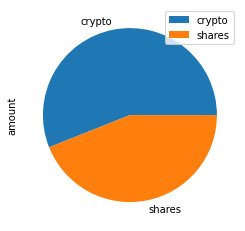

In [264]:
# Plot savings pie chart
# YOUR CODE HERE!
df_savings.plot.pie(y="amount")

In [265]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = float(df_savings.sum())

# Validate saving health
# YOUR CODE HERE!
if emergency_fund < total_savings:
    print("Great Job You Have Good Savings!")
elif emergency_fund ==total_savings:
    print("Great Job you have exactly enough savings!")
else:
    print(f"You're not in the best saving situtation. Please Save {(emergency_fund-total_savings):0.2f} more.")

Great Job You Have Good Savings!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [266]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen

timeframe ="1Day"

start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()


In [267]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
ticker = ["AGG", "SPY"]

df_stock_data = alpaca.get_bars(
    ticker, 
    timeframe, 
    start= start_date,
    end=end_date,
 
).df

# Reorganize the DataFrame
# Separate ticker data
# YOUR CODE HERE!
AGG = df_stock_data[df_stock_data['symbol']== 'AGG'].drop('symbol', axis=1)
SPY = df_stock_data[df_stock_data['symbol']== 'SPY'].drop('symbol', axis=1)

# Concatenate the ticker DataFrames
# YOUR CODE HERE!
df_stock_data = pd.concat([AGG, SPY],axis=1, keys=['AGG','SPY'])
df_stock_data

# Display sample data
display(df_stock_data.head())
display(df_stock_data.tail())

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                      SPY                  \
                          trade_count        vwap    open    high     low   
timestamp                                                                   
2016-05-02 04:00:00+00:00       15119  110.627199  206.90  208.18  206.41   
2016-05-03 04:00:00+00:00       15662  110.865995  206.50  206.80  205.28   
2016-05-04 04:00:00+00:00       13982  110.879063  205.00  205.85  204.42   
2016-05-05 04:00:00+00:00       15707  111.028363  205.57  205.98  204.47   
2016-05-06 04:00:00+00:00       12697  111.031967  204.04  205.77  203.88   

                                                                      
                            close     volume trade_count        vwap  
timestamp                                                             
2016-05-02 04:00:00+00:00  208.03   61908515      263580  207.294812  
2016-05-03 04:00:00+00:00  206.13  106422142      377518  206.312060  
2016-05-04 04:00:00+00:00  204.96   92199810      345261  205.090172  
2016-05-05 04:00:00+00:00  204.95   67597222      280622  205.141555  
2016-05-06 04:00:00+00:00  205.70   89131004      340335  204.937074

AGG                                     \
                             open      high     low   close   volume   
timestamp                                                              
2021-04-26 04:00:00+00:00  114.74  114.8015  114.65  114.65  3480337   
2021-04-27 04:00:00+00:00  114.60  115.1300  114.37  114.37  3820640   
2021-04-28 04:00:00+00:00  114.45  114.4685  114.20  114.43  7075831   
2021-04-29 04:00:00+00:00  114.14  114.3700  114.09  114.37  6208142   
2021-04-30 04:00:00+00:00  114.41  114.5150  114.33  114.49  6469432   

                                                      SPY                    \
                          trade_count        vwap    open    high       low   
timestamp                                                                     
2021-04-26 04:00:00+00:00       13521  114.706244  417.42  418.22  416.8111   
2021-04-27 04:00:00+00:00       12720  114.498315  417.97  418.14  416.3000   
2021-04-28 04:00:00+00:00       24303  114.379810  417.84  419.01  416.9000   
2021-04-29 04:00:00+00:00       21096  114.250702  420.38  420.72  416.4400   
2021-04-30 04:00:00+00:00       19582  114.456246  417.67  418.54  416.3400   

                                                                     
                            close    volume trade_count        vwap  
timestamp                                                            
2021-04-26 04:00:00+00:00  417.61  52076360      295872  417.505200  
2021-04-27 04:00:00+00:00  417.52  50324187      296302  417.481280  
2021-04-28 04:00:00+00:00  417.40  50692843      330050  417.742098  
2021-04-29 04:00:00+00:00  420.06  77056617      443399  418.825111  
2021-04-30 04:00:00+00:00  417.30  84731942      478844  417.651995

In [268]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirty_year = MCSimulation(
    portfolio_data= df_stock_data, 
    weights=[.40,.60], 
    num_simulation=500,
    num_trading_days= 252*30

)

In [269]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_thirty_year.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.90   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001808  206.50   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  205.00   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.57   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.04   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2016-05-02 04:00:00+00:00  208.18  206.41  208.03   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.13  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  204.96   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.95   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.70   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.009133  
2016-05-04 04:00:00+00:00  205.090172    -0.005676  
2016-05-05 04:00:00+00:00  205.141555    -0.000049  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [270]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!
MC_thirty_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\wadee\Rutgers\Rutgers-Personal\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.999752,0.997208,1.004154,0.996174,1.002650,1.005875,1.007969,1.002315,0.999408,1.007386,...,0.997709,1.000949,0.985770,0.991836,0.997981,1.007453,1.002776,1.015261,0.991566,1.002648
2,0.997904,0.993908,0.996691,0.992134,1.006627,1.012113,1.007881,1.006883,1.007003,1.020647,...,0.998723,1.009321,0.996630,0.979572,1.006938,0.997981,0.996101,1.019440,0.986861,0.987913
3,1.005292,0.986924,1.003240,0.993619,0.993064,1.015474,1.007348,1.003338,1.004870,1.027494,...,0.999840,1.021268,0.996051,0.976770,0.993569,1.006464,0.997810,1.010002,0.992358,0.991517
4,0.992466,0.989057,0.997035,1.005332,0.991706,1.021294,1.002316,0.993293,0.996251,1.028528,...,0.996680,1.020222,0.989914,0.985246,0.977165,1.014655,0.993925,1.017272,0.992825,0.997409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,17.252983,19.497089,14.304108,28.227642,23.225719,42.649237,23.333900,12.504099,21.714343,17.665271,...,10.394089,11.039843,5.093732,12.546231,22.171275,2.811980,11.008716,16.478963,13.342095,13.907403
7557,17.201529,19.376206,14.446886,28.400632,23.483636,42.487384,23.399971,12.410728,21.989265,17.817959,...,10.365076,11.040849,5.050316,12.341466,22.052131,2.829494,11.066817,16.414510,13.261368,13.898569
7558,17.161356,19.430405,14.388546,28.694903,23.262934,42.334431,23.387056,12.348030,22.112597,18.035410,...,10.402456,10.998668,5.073471,12.235651,22.287725,2.804332,10.974216,16.495620,13.473854,13.976033
7559,17.206990,19.342822,14.319175,28.755152,23.140689,41.993485,22.850057,12.361495,21.898588,17.814777,...,10.318779,11.033069,5.040440,12.329394,22.086173,2.791827,11.076506,16.497241,13.546660,14.043601


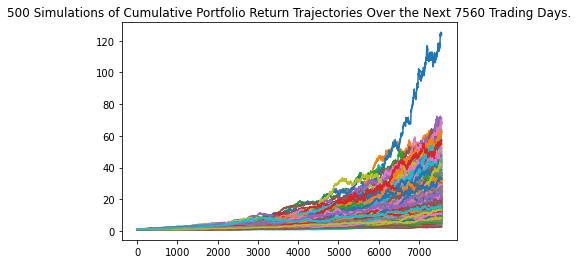

In [271]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot = MC_thirty_year.plot_simulation()


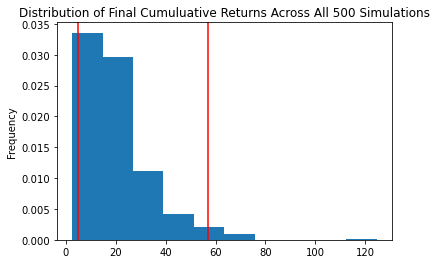

In [272]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot = MC_thirty_year.plot_distribution()

### Retirement Analysis

In [273]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
tbl = MC_thirty_year.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(tbl)

count           500.000000
mean             20.314861
std              13.663229
min               2.469734
25%              11.084045
50%              16.593998
75%              26.175264
max             124.619840
95% CI Lower      4.649631
95% CI Upper     56.788567
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [274]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*20000,2)
ci_upper = round(tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
     f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $92992.61 and $1135771.34


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [275]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(tbl[8]*30000,2)
ci_upper = round(tbl[9]*30000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $139488.92 and $1703657.01


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [276]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_five_year = MCSimulation(
    portfolio_data= df_stock_data, 
    weights=[.40,.60], 
    num_simulation=500,
    num_trading_days= 252*5
)

In [277]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_five_year.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.90   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001808  206.50   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  205.00   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.57   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.04   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2016-05-02 04:00:00+00:00  208.18  206.41  208.03   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.13  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  204.96   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.95   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.70   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.009133  
2016-05-04 04:00:00+00:00  205.090172    -0.005676  
2016-05-05 04:00:00+00:00  205.141555    -0.000049  
2016-05-06 04:00:00+00:00  204.937074     0.003659

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\wadee\Rutgers\Rutgers-Personal\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

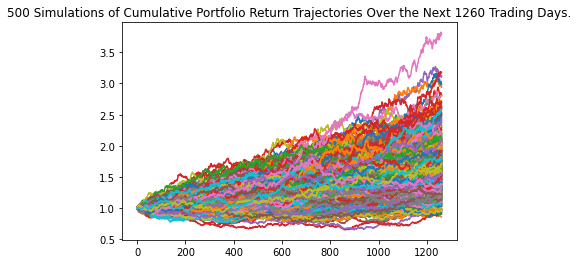

In [278]:
# Plot simulation outcomes
# YOUR CODE HERE!
plot_simulation = MC_five_year.plot_simulation()

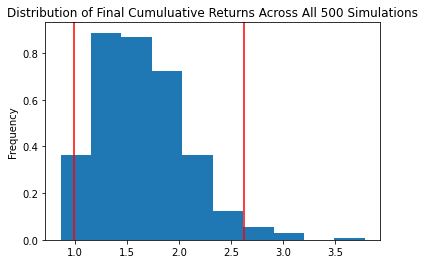

In [279]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
prob_dist = MC_five_year.plot_distribution()

In [280]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
sum_results = MC_five_year.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(sum_results)

count           500.000000
mean              1.641054
std               0.428091
min               0.857649
25%               1.309386
50%               1.599699
75%               1.908642
max               3.787409
95% CI Lower      0.987052
95% CI Upper      2.620214
Name: 1260, dtype: float64


In [281]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = ci_lower = round(sum_results[8]*60000,2)
ci_upper_five = round(sum_results[9]*60000,2)

print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $59223.1 and $157212.83


### Ten Years Retirement Option

In [282]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_ten_year = MCSimulation(
    portfolio_data= df_stock_data, 
    weights=[.40,.60], 
    num_simulation=500,
    num_trading_days= 252*10)

In [283]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!
MC_ten_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


c:\Users\wadee\Rutgers\Rutgers-Personal\02-Homework\05-APIs\Instructions\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.001792,0.996115,1.012013,0.993624,1.005726,0.996897,0.992360,0.997563,1.002288,0.991937,...,0.993321,1.008090,1.019750,1.003654,0.992880,0.990132,0.996725,0.980241,0.997306,0.999073
2,1.001546,0.993901,1.027339,0.985287,1.007907,1.005689,1.003119,0.993028,0.988578,0.987741,...,1.004070,1.003007,1.024629,1.012899,0.992541,0.976707,0.990030,0.986046,0.994571,1.012333
3,1.009315,1.005974,1.045151,0.988852,1.009695,0.998550,0.999606,0.995929,0.990193,0.978350,...,1.004083,1.000428,1.027510,1.010884,0.994125,0.972750,0.996130,0.977565,0.996230,1.023344
4,1.008568,1.010233,1.049429,1.002869,1.006259,0.989908,1.006458,0.988648,0.999152,0.976825,...,1.012083,0.992055,1.026325,1.007123,1.002486,0.973658,0.995219,0.969435,1.013695,1.009385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,1.405425,1.884034,1.544593,3.304938,2.020506,2.759808,3.412071,1.726566,2.725685,4.120679,...,2.120091,2.053124,3.412614,3.200542,3.478682,5.989632,1.751454,1.337483,2.240365,1.592912
2517,1.404456,1.890352,1.543536,3.354921,2.028014,2.765876,3.426250,1.747811,2.763491,4.133887,...,2.131002,2.045578,3.401321,3.239878,3.458900,6.057156,1.762813,1.338627,2.238974,1.591069
2518,1.423738,1.887971,1.539361,3.358692,2.035469,2.731600,3.441449,1.761769,2.778086,4.178467,...,2.125269,2.056943,3.374055,3.243168,3.455938,5.986444,1.774570,1.335379,2.250364,1.589720
2519,1.416241,1.889934,1.548342,3.415344,2.045385,2.737972,3.416969,1.761495,2.787523,4.106640,...,2.121935,2.066000,3.330912,3.253993,3.486409,6.017512,1.763259,1.331334,2.246313,1.590369


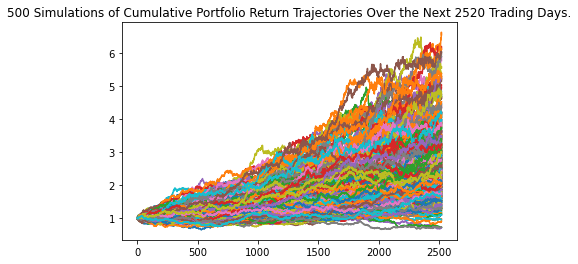

In [284]:
# Plot simulation outcomes
# YOUR CODE HERE!
ten_line_plot = MC_ten_year.plot_simulation()

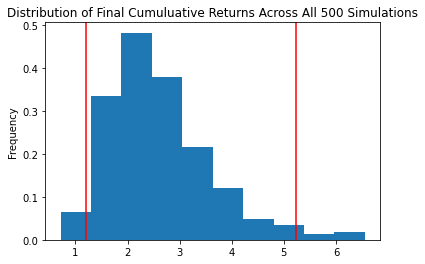

In [285]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
prob_dist_ten_year = MC_ten_year.plot_distribution()

In [286]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
ten_sum_results = MC_ten_year.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!
print(ten_sum_results)

count           500.000000
mean              2.605869
std               0.994108
min               0.714006
25%               1.933809
50%               2.404626
75%               3.135610
max               6.555020
95% CI Lower      1.211645
95% CI Upper      5.225687
Name: 2520, dtype: float64


In [287]:
# Set initial investment
# YOUR CODE HERE!
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten= ci_lower = round(ten_sum_results[8]*60000,2)
ci_upper_ten = round(ten_sum_results[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $72698.69 and $313541.22
